In [181]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn        

# Набор данных для рекомендации купонов в автомобиле

**Цель:** На основе этих данных мы должны предугадать примет ли человек купон в различных сценариях вождения.

**Источник**:http://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

# Признаки:
1. **destination** - ***Пункт назначения*** (No Urgent Place, Home, Work) 
2. **passanger** - ***Пассажиры***: (Alone, Friend(s), Kid(s), Partner) 
3. **weather** - ***Погода*** (Sunny, Rainy, Snowy) 
4. **temperature** - ***Температура*** (55, 80, 30) 
5. **time** - ***Время*** (2PM, 10AM, 6PM, 7AM, 10PM)
6. **coupon** - ***Купон*** (Restaurant(<20dlrs), Coffee House, Carry out & Take away, Bar, Restaurant(20-50dlrs))
7. **expiration** - ***Время действия купона*** (1d, 2h (купон сгорает через 1 день или через 2 часа))
8. **gender** ***Пол*** (Female, Male)
9. **age** - ***Возраст*** (21, 46, 26, 31, 41, 50plus, 36, below21)
10. **maritalStatus** - ***Семейное положение*** (Unmarried partner, Single, Married partner, Divorced, Widowed)
11. **has_Children** - ***Наличие детей*** (1, 0)
12. **education** - ***Образование*** (Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School)
13. **occupation** - ***Профессия*** (Unemployed, Architecture & Engineering, Student
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry)
14. **income** - ***Доход в год*** (37500 - 49999, 62500 - 74999, 12500 - 24999, 75000 - 87499,
50000 - 62499, 25000 - 37499, 100000 or More, 87500 - 99999, Less than 12500)
15. **Bar** - ***Частота посещения бара в месяц*** (never, less1, 1-3, gt8, nan4-8)
16. **CoffeeHouse** - ***Частота посещения кофейни в месяц*** (never, less1, 4-8, 1-3, gt8, nan)
17. **CarryAway** - ***Частота покупки еды на-вынос*** (n4-8, 1-3, gt8, less1, never )
18. **RestaurantLessThan20** - ***Частота посещения ресторана в месяц с средним чеком на 20долларов*** (4-8, 1-3, less1, gt8, never)
19. **Restaurant20To50** - ***Частота посещения ресторана в месяц с средним чеком на 20-50 долларов*** (1-3, less1, never, gt8, 4-8, nan)
20. **toCoupon_GEQ15min** - ***Заведение, в котором можно использовать купон, находится в 15мин езды?*** (0,1)
21. **toCoupon_GEQ25min** - ***Заведение, в котором можно использовать купон, находится в 25мин езды?*** (0, 1)
22. **direction_same** - ***Ресторан или бар находятся по пути*** (0, 1)
23. **direction_opp** - ***Ресторан или бар не находятся по пути*** (0, 1)
24. **Y** - ***Примут ли купон*** (1, 0)



# Считаем данные

In [263]:
url='https://raw.githubusercontent.com/MakBerl/ML_homeworks/main/in-vehicle-coupon-recommendation.csv'
data_raw = pd.read_csv(url, delimiter=',')


pd.set_option('max_columns',None)
data_raw.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


# Обработка пропущенных значений
Выведем уникальные значение категориальных столбцов, чтобы, понять есть ли пропущенные значения и сколько их

In [183]:
data_raw.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Заметим, что пропущенных начений в столбце **car** очень много, поэтому удалим его.

In [184]:
data_raw.drop('car', axis=1, inplace=True)

Пропущенные значения в оставшихся категориях заполним модой.

In [185]:
data_raw['Bar'].fillna(data_raw['Bar'].mode().iloc[0], inplace=True)
data_raw['CoffeeHouse'].fillna(data_raw['CoffeeHouse'].mode().iloc[0], inplace=True)
data_raw['CarryAway'].fillna(data_raw['CarryAway'].mode().iloc[0], inplace=True)
data_raw['RestaurantLessThan20'].fillna(data_raw['RestaurantLessThan20'].mode().iloc[0], inplace=True)
data_raw['Restaurant20To50'].fillna(data_raw['Restaurant20To50'].mode().iloc[0], inplace=True)

Заменим диапазонные значения на среднее этого диапазона в стобцах:\
**income**, **RestaurantLessThan20**, **Restaurant20To50**,**Bar**, **CoffeeHouse**, **CarryAway**, **age**


### Столбец age:

In [191]:
data_raw.age.unique()

array(['21', '46', '26', '31', '41', 51, '36', 16], dtype=object)

Заменим значения в графе **age** след образом:\
below21 **->** 16, 50plus **->** 51

In [192]:
data_raw.loc[data_raw['age'] == 'below21', 'age'] = 16
data_raw.loc[data_raw['age'] == '50plus', 'age'] = 51

### Переходим к столбцу **income**:

In [193]:
data_raw.income.unique()

array([43750, 68750, 18750, 81250, 56250, 31250, 106250, 93750, 6250],
      dtype=object)

Заменим значения в графе **income** след образом:\
'Less than 12500' -> 6250, '12500 - 24999' -> 18750, '25000 - 37499' -> 31250, '37500 - 49999' -> 43750, '50000 - 62499' -> 56250, '62500 - 74999' -> 68750, '75000 - 87499' -> 81250, '87500 - 99999' -> 93750, '100000 or More' -> 106250

In [194]:
data_raw.loc[data_raw.income == 'Less than $12500', 'income'] = 6250
data_raw.loc[data_raw.income == '$12500 - $24999', 'income'] = 18750
data_raw.loc[data_raw.income == '$25000 - $37499', 'income'] = 31250
data_raw.loc[data_raw.income == '$37500 - $49999', 'income'] =  43750
data_raw.loc[data_raw.income == '$50000 - $62499', 'income'] = 56250
data_raw.loc[data_raw.income == '$62500 - $74999', 'income'] = 68750
data_raw.loc[data_raw.income == '$75000 - $87499', 'income'] =  81250
data_raw.loc[data_raw.income == '$87500 - $99999', 'income'] = 93750
data_raw.loc[data_raw.income == '$100000 or More', 'income'] = 106250

### Переходим к столбцам **Bar**, **CoffeeHouse**, **CarryAway**, **RestaurantLessThan20**, **Restaurant20To50**:

Заменим значения в столбцах след образом:\
    4-8->6, 1-3->2, gt8->10, less1->1, never->0

In [195]:
data_raw=data_raw.replace(to_replace='gt8', value=10)
data_raw=data_raw.replace(to_replace='4~8', value=6)
data_raw=data_raw.replace(to_replace='1~3',value=2)
data_raw=data_raw.replace(to_replace='less1',value=1)
data_raw=data_raw.replace(to_replace='never',value=0)
data_raw.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43750,0,0,2,6,2,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43750,0,0,2,6,2,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43750,0,0,2,6,2,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43750,0,0,2,6,2,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43750,0,0,2,6,2,1,1,0,0,1,0


Сделаем их *numeric* объектами

In [196]:
data_raw['age']=data_raw['age'].astype('int64')
data_raw['income']=data_raw['income'].astype('int64')
data_raw['Bar']=data_raw['Bar'].astype('int64')
data_raw['CoffeeHouse']=data_raw['CoffeeHouse'].astype('int64')
data_raw['CarryAway']=data_raw['CarryAway'].astype('int64')
data_raw['RestaurantLessThan20']=data_raw['RestaurantLessThan20'].astype('int64')
data_raw['Restaurant20To50']=data_raw['Restaurant20To50'].astype('int64')


In [197]:
#data_raw['age','income','Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']=data_raw['age','income','Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'].astype('int64')

## Категоризация столбцов



Заменим столбцы с бинарными значениями на логические **True** и **False**.\
К этим столбцам относятся:\
**has_children, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, gender, expiration, Y**

In [198]:
data_raw['has_children']=data_raw['has_children']==1
data_raw['toCoupon_GEQ5min']=data_raw['toCoupon_GEQ5min']==1
data_raw['toCoupon_GEQ15min']=data_raw['toCoupon_GEQ15min']==1
data_raw['toCoupon_GEQ25min']=data_raw['toCoupon_GEQ25min']==1
data_raw['direction_same']=data_raw['direction_same']==1
data_raw['direction_opp']=data_raw['direction_opp']==1
data_raw['gender']=data_raw['gender']=='Female'
data_raw['expiration']=data_raw['expiration']=='1d'
data_raw['Y']=data_raw['Y']==1

data_raw.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),True,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,True,False,False,False,True,True
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,False,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,True,False,False,False,True,False
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,False,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,True,True,False,False,True,True
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,False,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,True,True,False,False,True,False
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,True,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,True,True,False,False,True,False


In [199]:
data_raw.occupation.unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

Пометим столбцы 
**destination, passanger, weather, time, coupon, maritalStatus, education, occupation**\
как ***категориальные***

In [200]:
data_raw['destination'] = data_raw['destination'].astype('category')
data_raw['passanger'] = data_raw['passanger'].astype('category')
data_raw['weather'] = data_raw['weather'].astype('category')
data_raw['time'] = data_raw['time'].astype('category')
data_raw['coupon'] = data_raw['coupon'].astype('category')
data_raw['maritalStatus'] = data_raw['maritalStatus'].astype('category')
data_raw['education'] = data_raw['education'].astype('category')
data_raw['occupation'] = data_raw['occupation'].astype('category')

Получим информацию о бинарных признаках:

In [201]:
data_raw.describe(include='bool')

,expiration,gender,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684,12684,12684,12684,12684,12684
unique,2,2,2,1,2,2,2,2,2
top,True,True,False,True,True,False,False,True,True
freq,7091,6511,7431,12684,7122,11173,9960,9960,7210


Получим информацию о категориальных признаках:

In [202]:
data_raw.describe(include='category')

,destination,passanger,weather,time,coupon,maritalStatus,education,occupation
count,12684,12684,12684,12684,12684,12684,12684,12684
unique,3,4,3,5,5,5,6,25
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,Married partner,Some college - no degree,Unemployed
freq,6283,7305,10069,3230,3996,5100,4351,1870


Получим информацию о числовых признаках *(средние значения, стандартное отклонение, минимальное и макимальное значения)*:

In [203]:
data_raw.describe()

,temperature,age,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,32.264980,52994.914853,1.448597,2.512299,4.177704,3.739751,1.565279
std,19.154486,10.669752,31832.779695,2.182147,2.968587,2.977741,2.864959,1.797020
min,30.000000,16.000000,6250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,31250.000000,0.000000,1.000000,2.000000,2.000000,1.000000
50%,80.000000,31.000000,43750.000000,1.000000,1.000000,2.000000,2.000000,1.000000
75%,80.000000,41.000000,81250.000000,2.000000,2.000000,6.000000,6.000000,2.000000
max,80.000000,51.000000,106250.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Визуализация данных


Вычислим матрицу корреляции:

In [204]:
corr_mat = data_raw.corr()
corr_mat

,temperature,expiration,gender,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.124090,0.025504,-0.018837,-0.019716,-0.030233,0.001439,-0.017673,-0.000915,0.034201,-0.029375,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
expiration,-0.124090,1.000000,-0.001264,-0.021208,-0.016020,-0.020606,-0.009460,0.003813,0.001968,-0.010397,-0.002863,NaN,-0.042740,0.032977,-0.033584,0.033584,0.129920
gender,0.025504,-0.001264,1.000000,0.099847,0.159956,-0.101738,-0.141308,0.017929,0.019228,0.015443,-0.028312,NaN,0.007028,-0.002743,0.004496,-0.004496,-0.043969
age,-0.018837,-0.021208,0.099847,1.000000,0.442096,0.084885,-0.153278,-0.030730,-0.024683,-0.012508,-0.023809,NaN,0.036125,-0.002655,-0.030604,0.030604,-0.058267
has_children,-0.019716,-0.016020,0.159956,0.442096,1.000000,0.090754,-0.193902,0.029326,-0.055015,-0.050277,-0.002263,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
income,-0.030233,-0.020606,-0.101738,0.084885,0.090754,1.000000,0.014695,-0.018188,0.012684,0.095763,0.078273,NaN,0.020129,-0.006645,-0.024551,0.024551,-0.027407
Bar,0.001439,-0.009460,-0.141308,-0.153278,-0.193902,0.014695,1.000000,0.230711,0.169099,0.170635,0.290031,NaN,-0.017978,0.000019,-0.009852,0.009852,0.052568
CoffeeHouse,-0.017673,0.003813,0.017929,-0.030730,0.029326,-0.018188,0.230711,1.000000,0.228413,0.306053,0.253948,NaN,-0.003190,0.001551,0.005012,-0.005012,0.071067
CarryAway,-0.000915,0.001968,0.019228,-0.024683,-0.055015,0.012684,0.169099,0.228413,1.000000,0.408822,0.173645,NaN,-0.008944,-0.003556,-0.000133,0.000133,0.022225
RestaurantLessThan20,0.034201,-0.010397,0.015443,-0.012508,-0.050277,0.095763,0.170635,0.306053,0.408822,1.000000,0.416573,NaN,-0.008680,-0.010854,-0.010527,0.010527,0.040082


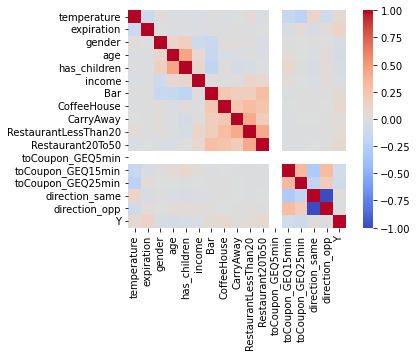

In [205]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

По корреляции видим, что стобцы **direction_same** и **derection_opp** зависят друг от друга, удалим один из них

In [206]:
data_raw.drop('direction_opp',axis=1,inplace=True)

Так же заметим, что в столбец **toCoupon_GEQ5min** никак не коррелирует ни с одном из признаков и в нем все элементы равны **1**, избавимся от него

In [207]:
data_raw.drop('toCoupon_GEQ5min',axis=1,inplace=True)

## Построим несколько графиков

На этом графике можем увидеть сколько людей приняли купон

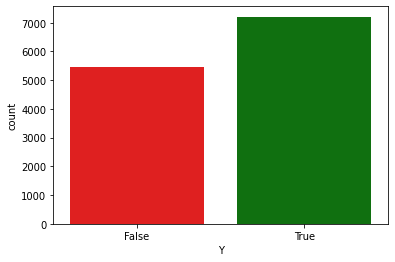

In [208]:
sns.countplot(x='Y', data=data_raw,palette=['red','green'])
pass

На этом графике можем увидеть кем работает большинство людей

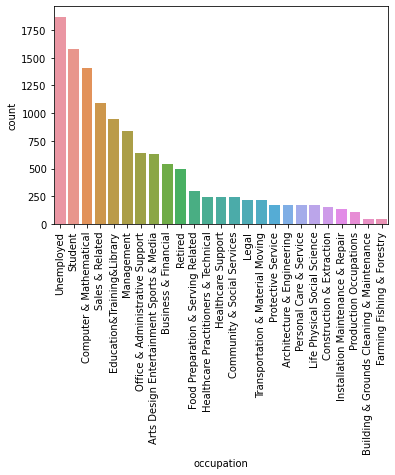

In [209]:
sns.countplot(x='occupation', order=data_raw['occupation'].value_counts().index, data=data_raw)
plt.xticks(rotation=90)
pass

На этом графике можем пронаблюдать во сколько люди принимали купоны

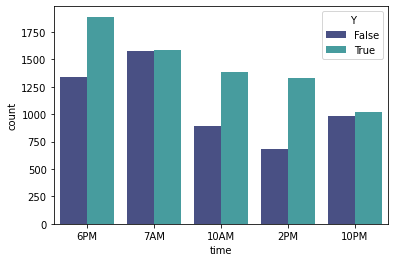

In [210]:
sns.countplot(x='time',hue='Y', order=data_raw['time'].value_counts().index, data=data_raw, palette="mako")
pass

Тут мы можем посмотреть во сколько примерно у людей появляются дети

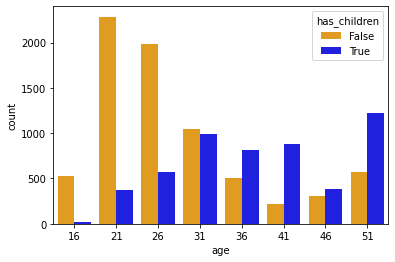

In [211]:
sns.countplot(x='age',hue='has_children', data=data_raw, palette=['orange','blue'])
pass

Здесь представлена зависимось зарплаты от возраста

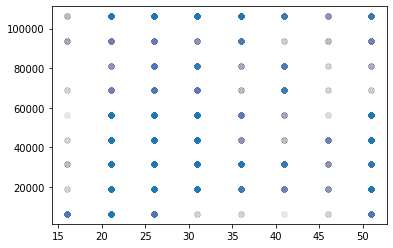

In [212]:
plt.scatter(data_raw['age'],data_raw['income'], alpha=0.005)
pass

Тут вы можем увидеть какие купоны охотнее принимали(левый столбец - срок действия 1 день, правый - 2 часа)

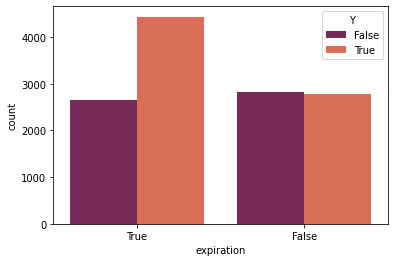

In [213]:
sns.countplot(x='expiration',hue='Y', order=data_raw['expiration'].value_counts().index, data=data_raw,palette="rocket")
pass

Здесь мы можем пронаблюдать температуру в разное время

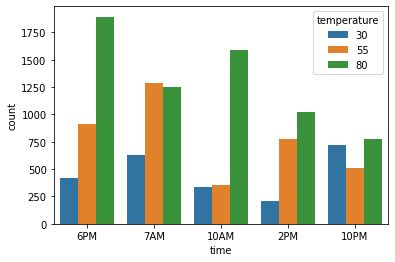

In [214]:
sns.countplot(x='time',hue='temperature', order=data_raw['time'].value_counts().index, data=data_raw)
pass

# Отбор признаков

In [215]:
data_raw.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),True,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,False,False,False,True
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,False,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,False,False,False,False
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,False,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,True,False,False,True
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,False,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,True,False,False,False
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,True,True,21,Unmarried partner,True,Some college - no degree,Unemployed,43750,0,0,2,6,2,True,False,False,False


Все отлично. Считаю, что лишних признаков больше нет

In [216]:
#data_raw.drop('occupation',axis=1,inplace=True)
#data_raw.drop('time',axis=1,inplace=True)
#data_raw.drop('education',axis=1,inplace=True)

In [217]:
bool_columns=[c for c in data_raw.columns if data_raw[c].dtype.name == 'bool']
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'category']
#numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name == 'int64']
print(bool_columns)
print(categorical_columns)
print(numerical_columns)

['expiration', 'gender', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y']
['destination', 'passanger', 'weather', 'time', 'coupon', 'maritalStatus', 'education', 'occupation']
['temperature', 'age', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


# Обработка  признаков для ML

## Обработка бинарных признаков

Факторизуем бинарные признаки

In [218]:
for i in bool_columns:
    data_raw[i] = pd.factorize(data_raw[i])[0]
bin_table=data_raw[bool_columns]
bin_table.head()

,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1
4,0,0,0,1,0,0,1


## Обработка категориальных признаков

Проведем бинаризацию категориальных признаков

In [219]:
categ_table = pd.DataFrame()

#job_dummies = pd.get_dummies(data_raw['job'])
#cat_table=pd.concat((job_dummies, marital_dummies,education_dummies,month_dummies), axis=1)

for i in categorical_columns:
    tmp_table=pd.get_dummies(data_raw[i])
    categ_table=pd.concat((categ_table,tmp_table), axis=1)

categ_table.head()

,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,10AM,10PM,2PM,6PM,7AM,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),Divorced,Married partner,Single,Unmarried partner,Widowed,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree,Architecture & Engineering,Arts Design Entertainment Sports & Media,Building & Grounds Cleaning & Maintenance,Business & Financial,Community & Social Services,Computer & Mathematical,Construction & Extraction,Education&Training&Library,Farming Fishing & Forestry,Food Preparation & Serving Related,Healthcare Practitioners & Technical,Healthcare Support,Installation Maintenance & Repair,Legal,Life Physical Social Science,Management,Office & Administrative Support,Personal Care & Service,Production Occupations,Protective Service,Retired,Sales & Related,Student,Transportation & Material Moving,Unemployed
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Обработка числовых признаков

Проведем стандартизацию числовых признаков

In [220]:
num_table_stand=data_raw[numerical_columns]
#num_table_stand = (data_raw[numerical_columns]- data_raw[numerical_columns].mean(axis = 0))/data_raw[numerical_columns].std(axis = 0)

num_table_stand.describe()

,temperature,age,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,32.264980,52994.914853,1.448597,2.512299,4.177704,3.739751,1.565279
std,19.154486,10.669752,31832.779695,2.182147,2.968587,2.977741,2.864959,1.797020
min,30.000000,16.000000,6250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,31250.000000,0.000000,1.000000,2.000000,2.000000,1.000000
50%,80.000000,31.000000,43750.000000,1.000000,1.000000,2.000000,2.000000,1.000000
75%,80.000000,41.000000,81250.000000,2.000000,2.000000,6.000000,6.000000,2.000000
max,80.000000,51.000000,106250.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Cоединяем все 3 таблицы

In [221]:
data_stand=pd.concat((num_table_stand,bin_table, categ_table),axis=1)
data_stand.head()

,temperature,age,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,10AM,10PM,2PM,6PM,7AM,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),Divorced,Married partner,Single,Unmarried partner,Widowed,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree,Architecture & Engineering,Arts Design Entertainment Sports & Media,Building & Grounds Cleaning & Maintenance,Business & Financial,Community & Social Services,Computer & Mathematical,Construction & Extraction,Education&Training&Library,Farming Fishing & Forestry,Food Preparation & Serving Related,Healthcare Practitioners & Technical,Healthcare Support,Installation Maintenance & Repair,Legal,Life Physical Social Science,Management,Office & Administrative Support,Personal Care & Service,Production Occupations,Protective Service,Retired,Sales & Related,Student,Transportation & Material Moving,Unemployed
0,55,21,43750,0,0,2,6,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,80,21,43750,0,0,2,6,2,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,21,43750,0,0,2,6,2,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,80,21,43750,0,0,2,6,2,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,80,21,43750,0,0,2,6,2,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [222]:
len(data_stand.columns)

71

# Подготовка тренировочной и тестовой выборки

In [223]:
y = data_stand['Y']
X = data_stand.drop(['Y'], axis=1)
features_names=X.columns
X.head()

,temperature,age,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,10AM,10PM,2PM,6PM,7AM,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),Divorced,Married partner,Single,Unmarried partner,Widowed,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree,Architecture & Engineering,Arts Design Entertainment Sports & Media,Building & Grounds Cleaning & Maintenance,Business & Financial,Community & Social Services,Computer & Mathematical,Construction & Extraction,Education&Training&Library,Farming Fishing & Forestry,Food Preparation & Serving Related,Healthcare Practitioners & Technical,Healthcare Support,Installation Maintenance & Repair,Legal,Life Physical Social Science,Management,Office & Administrative Support,Personal Care & Service,Production Occupations,Protective Service,Retired,Sales & Related,Student,Transportation & Material Moving,Unemployed
0,55,21,43750,0,0,2,6,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,80,21,43750,0,0,2,6,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,21,43750,0,0,2,6,2,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,80,21,43750,0,0,2,6,2,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,80,21,43750,0,0,2,6,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 358)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

11415 1269


# Classifiers

## Bayes Classifier

In [225]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

arr_test_e=(1 - mnb.score(X_test, y_test))
arr_train_e=(1- mnb.score(X_train, y_train))
print('Ошибка на обучающей выборке', arr_train_e)
print('Ошибка на тестовой выборке', arr_test_e)

Ошибка на обучающей выборке 0.4346911957950066
Ошибка на тестовой выборке 0.4286840031520882


## K Nearest Neighbors

In [226]:
from sklearn.neighbors import KNeighborsClassifier
arr_train_e=[]
arr_test_e=[]
x_ax=[]
err_test=0
err_train=0
for k in range(1,100,5):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train.values, y_train.values)
    arr_test_e.append(1 - knn.score(X_test.values, y_test.values))
    arr_train_e.append(1- knn.score(X_train.values, y_train.values))
    x_ax.append(k)

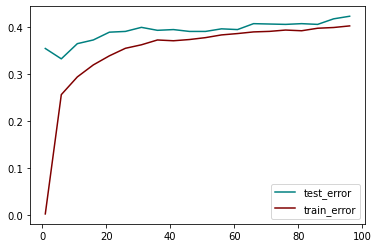

In [227]:
plt.plot(x_ax,arr_test_e, color='teal')
plt.plot(x_ax,arr_train_e, color='maroon')
plt.legend(['test_error','train_error'])
pass

## Random Forest

In [238]:
from sklearn import ensemble
arr_train_e=[]
arr_test_e=[]
x_ax=[]
err_test=0
err_train=0
for k in range(1,1002,100):
    rf = ensemble.RandomForestClassifier(n_estimators = k)
    rf.fit(X_train.values, y_train.values)
    arr_test_e.append(1 - rf.score(X_test.values, y_test.values))
    arr_train_e.append(1- rf.score(X_train.values, y_train.values))
    x_ax.append(k)

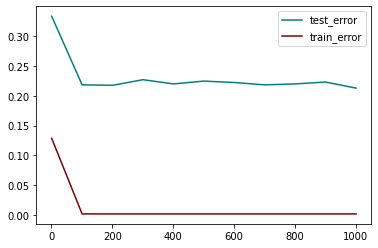

In [239]:
plt.plot(x_ax,arr_test_e, color='teal')
plt.plot(x_ax,arr_train_e, color='maroon')
plt.legend(['test_error','train_error'])
pass

### Значимость признаков

Выведем признаки в порядке их значимости

In [230]:
d=len(features_names)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, features_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'CoffeeHouse' (0.065158)
 2. feature 'income' (0.064126)
 3. feature '  age' (0.055596)
 4. feature '  Bar' (0.048923)
 5. feature 'CarryAway' (0.042397)
 6. feature 'RestaurantLessThan20' (0.041498)
 7. feature 'Restaurant20To50' (0.041011)
 8. feature 'expiration' (0.029770)
 9. feature 'Carry out & Take away' (0.026842)
10. feature 'Restaurant(<20)' (0.024293)
11. feature 'temperature' (0.024115)
12. feature 'Coffee House' (0.021928)
13. feature '  Bar' (0.021542)
14. feature 'toCoupon_GEQ15min' (0.021427)
15. feature 'gender' (0.021277)
16. feature 'Bachelors degree' (0.018320)
17. feature 'Some college - no degree' (0.017078)
18. feature 'has_children' (0.016830)
19. feature 'Single' (0.015201)
20. feature 'Married partner' (0.014352)
21. feature '  6PM' (0.014093)
22. feature 'Unemployed' (0.013917)
23. feature 'Graduate degree (Masters or Doctorate)' (0.013281)
24. feature 'direction_same' (0.012857)
25. feature 'Unmarried partner' (0.012781)
26. fea

## Gradient Boosting

In [231]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
arr_train_e=[]
arr_test_e=[]
x_ax=[]
err_test=0
err_train=0
for k in range(1,1002,100):
    gbt = ensemble.GradientBoostingClassifier(n_estimators = k)
    gbt.fit(X_train, y_train)
    arr_test_e.append(1 - gbt.score(X_test, y_test))
    arr_train_e.append(1- gbt.score(X_train, y_train))
    x_ax.append(k)

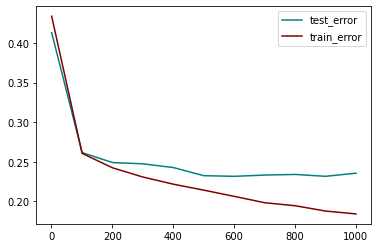

In [235]:
plt.plot(x_ax,arr_test_e, color='teal')
plt.plot(x_ax,arr_train_e, color='maroon')
plt.legend(['test_error','train_error'])
pass

## SVC


In [233]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке', err_train)
print('Ошибка на тестовой выборке', err_test)

Ошибка на обучающей выборке 0.2848007008322383
Ошибка на тестовой выборке 0.35776201733648544


## AdaBoost

In [234]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train.values, y_train.values)

err_train = np.mean(y_train.values != ada.predict(X_train.values))
err_test = np.mean(y_test.values != ada.predict(X_test.values))

print('Ошибка на обучающей выборке', err_train)
print('Ошибка на тестовой выборке', err_test)

Ошибка на обучающей выборке 0.31046868155935176
Ошибка на тестовой выборке 0.3049645390070922


## Extremely Randomized Trees

In [108]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 10000).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке', err_train)
print('Ошибка на тестовой выборке', err_test)

0.002628120893561104 0.2624113475177305


## Вывод, касательный ошибок

В результате мы смогли достичь минимальной ошибки на тестовой выборке приблизительно в 23 процента при помощи следующих классификаторов:\
    **Random Forest** - 21%\
    **Gradient Boosting** - 23%\
    **Extremely Randomized Trees** - 26%\
Минимальные ошибки на тестовой выборке на других классификаторах:\
    **KNN** - 33%\
    **SVC** - 35%\
    **AdaBoost** - 30%

# Общий вывод

В данной работе были:\
    * Изучены методы визуализации данных и вычисление основных характеристик\
    * Изучены методы обработки пропущенных значений и категориальных признаков\
    * Изучены методы проведения нормализации данных\
    * Изучены методы разбиения данных на выборки\
    * В качестве обучения использованы различные классификаты, такие как:\
      KNN, Random Forest, Gradient Boosting, SVC, AdaBoost, Extremely Randomized Trees \
    *Построены графики зависимости точности классификатора, от его гиперпараметра для конкретной модели.




# Дополнение


Попробуем изначально считать все признаки **категориальными**, отбросим пару признаков и посмотрим какую ошибку при обучении мы сможем получить

In [241]:
#Считали
d_r = pd.read_csv('/home/makberl/Downloads/in-vehicle-coupon-recommendation.csv', delimiter=',')
pd.set_option('max_columns',None)

#Обрабатываем пропущенные столбцы
d_r.drop('car', axis=1, inplace=True)

d_r['Bar'].fillna(d_r['Bar'].mode().iloc[0], inplace=True)
d_r['CoffeeHouse'].fillna(d_r['CoffeeHouse'].mode().iloc[0], inplace=True)
d_r['CarryAway'].fillna(d_r['CarryAway'].mode().iloc[0], inplace=True)
d_r['RestaurantLessThan20'].fillna(d_r['RestaurantLessThan20'].mode().iloc[0], inplace=True)
d_r['Restaurant20To50'].fillna(d_r['Restaurant20To50'].mode().iloc[0], inplace=True)

#Делаем из столбцов 0/1 столбцы True/False
d_r['has_children']=d_r['has_children']==1
d_r['toCoupon_GEQ5min']=d_r['toCoupon_GEQ5min']==1
d_r['toCoupon_GEQ15min']=d_r['toCoupon_GEQ15min']==1
d_r['toCoupon_GEQ25min']=d_r['toCoupon_GEQ25min']==1
d_r['direction_same']=d_r['direction_same']==1
d_r['direction_opp']=d_r['direction_opp']==1
d_r['gender']=d_r['gender']=='Female'
d_r['expiration']=d_r['expiration']=='1d'
d_r['Y']=d_r['Y']==1

#Удаляем ненужные столбцы
d_r.drop('direction_opp',axis=1,inplace=True)
d_r.drop('toCoupon_GEQ5min',axis=1,inplace=True)
d_r.drop('occupation',axis=1,inplace=True)
d_r.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),True,True,21,Unmarried partner,True,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,False,False,False,True
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,False,True,21,Unmarried partner,True,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,False,False,False,False
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,False,True,21,Unmarried partner,True,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,True,False,False,True
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,False,True,21,Unmarried partner,True,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,True,False,False,False
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,True,True,21,Unmarried partner,True,Some college - no degree,$37500 - $49999,never,never,1~3,4~8,1~3,True,False,False,False


In [242]:
d_r_bool_columns=[c for c in d_r.columns if d_r[c].dtype.name == 'bool']
d_r_categ_columns=[c for c in d_r.columns if d_r[c].dtype.name != 'bool']

for i in d_r_categ_columns:
    d_r[i]=d_r[i].astype('category')


In [243]:
print(d_r_bool_columns)
print(d_r_categ_columns)

['expiration', 'gender', 'has_children', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'Y']
['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'age', 'maritalStatus', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


Факторизуем бин признаки

In [244]:
for i in d_r_bool_columns:
    d_r[i] = pd.factorize(d_r[i])[0]
d_r_bin_table=d_r[d_r_bool_columns]
d_r_bin_table.head()

,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1
4,0,0,0,1,0,0,1


Бинаризируем категориальные столбцы

In [245]:
d_r_categ_table = pd.DataFrame()

#job_dummies = pd.get_dummies(data_raw['job'])
#cat_table=pd.concat((job_dummies, marital_dummies,education_dummies,month_dummies), axis=1)

for i in d_r_categ_columns:
    tmp_table=pd.get_dummies(d_r[i])
    d_r_categ_table=pd.concat((d_r_categ_table,tmp_table), axis=1)

d_r_categ_table.head()

,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,30,55,80,10AM,10PM,2PM,6PM,7AM,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),21,26,31,36,41,46,50plus,below21,Divorced,Married partner,Single,Unmarried partner,Widowed,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree,$100000 or More,$12500 - $24999,$25000 - $37499,$37500 - $49999,$50000 - $62499,$62500 - $74999,$75000 - $87499,$87500 - $99999,Less than $12500,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never
0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Объединим таблицы

In [255]:
d_r_data_stand=pd.concat((d_r_bin_table, d_r_categ_table),axis=1)
d_r_data_stand.head()

,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,30,55,80,10AM,10PM,2PM,6PM,7AM,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),21,26,31,36,41,46,50plus,below21,Divorced,Married partner,Single,Unmarried partner,Widowed,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree,$100000 or More,$12500 - $24999,$25000 - $37499,$37500 - $49999,$50000 - $62499,$62500 - $74999,$75000 - $87499,$87500 - $99999,Less than $12500,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never
0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Стандартизация???

In [247]:
#d_r_data_stand = (d_r_data_stand- d_r_data_stand.mean(axis = 0))/d_r_data_stand.std(axis = 0)

d_r_data_stand.describe()

,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,30,55,80,10AM,10PM,2PM,6PM,7AM,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),21,26,31,36,41,46,50plus,below21,Divorced,Married partner,Single,Unmarried partner,Widowed,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree,$100000 or More,$12500 - $24999,$25000 - $37499,$37500 - $49999,$50000 - $62499,$62500 - $74999,$75000 - $87499,$87500 - $99999,Less than $12500,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.00000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,0.440949,0.486676,0.585856,0.561495,0.119126,0.214759,0.431567,0.255203,0.495348,0.249448,0.575922,0.260013,0.079313,0.084752,0.095396,0.110769,0.793835,0.182592,0.302744,0.514664,0.179360,0.158152,0.158389,0.254652,0.249448,0.159019,0.188663,0.315043,0.117629,0.219647,0.209161,0.201750,0.160754,0.103989,0.086172,0.054084,0.140965,0.043125,0.040681,0.402081,0.374645,0.172343,0.010249,0.090902,0.341769,0.146011,0.071350,0.006938,0.343031,0.136865,0.144355,0.158704,0.142305,0.130795,0.066698,0.067565,0.070561,0.082151,0.194970,0.084831,0.027515,0.274519,0.418165,0.254257,0.140650,0.087591,0.283980,0.233523,0.380243,0.335699,0.12567,0.146326,0.012062,0.434090,0.282245,0.101309,0.165011,0.017345,0.259382,0.057395,0.020814,0.494008,0.168401
std,0.496520,0.499842,0.492593,0.496224,0.323950,0.410671,0.495314,0.435993,0.499998,0.432711,0.494222,0.438658,0.270237,0.278524,0.293772,0.313859,0.404566,0.386347,0.459463,0.499805,0.383668,0.364898,0.365119,0.435682,0.432711,0.365708,0.391256,0.464551,0.322180,0.414024,0.406726,0.401323,0.367318,0.305259,0.280628,0.226192,0.347999,0.203147,0.197558,0.490338,0.484050,0.377693,0.100722,0.287481,0.474321,0.353131,0.257418,0.083008,0.474740,0.343719,0.351463,0.365414,0.349377,0.337189,0.249508,0.251009,0.256101,0.274605,0.396193,0.278641,0.163585,0.446289,0.493277,0.435460,0.347673,0.282710,0.450945,0.423089,0.485466,0.472253,0.33149,0.353447,0.109169,0.495656,0.450110,0.301749,0.371205,0.130557,0.438313,0.232605,0.142766,0.499984,0.374237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000

In [248]:
y1 = d_r_data_stand['Y']
X1 = d_r_data_stand.drop(['Y'], axis=1)
features_names=X1.columns
X1.head()

,expiration,gender,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Home,No Urgent Place,Work,Alone,Friend(s),Kid(s),Partner,Rainy,Snowy,Sunny,30,55,80,10AM,10PM,2PM,6PM,7AM,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20),21,26,31,36,41,46,50plus,below21,Divorced,Married partner,Single,Unmarried partner,Widowed,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree,$100000 or More,$12500 - $24999,$25000 - $37499,$37500 - $49999,$50000 - $62499,$62500 - $74999,$75000 - $87499,$87500 - $99999,Less than $12500,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never,1~3,4~8,gt8,less1,never
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [249]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.1, random_state = 358)

N1_train, _ = X1_train.shape 
N1_test,  _ = X1_test.shape 
print(N1_train, N1_test)

11415 1269


# Bayes

In [250]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X1_train.values, y1_train.values)

arr_test_e1=(1 - mnb.score(X1_test.values, y1_test.values))
arr_train_e1=(1- mnb.score(X1_train.values, y1_train.values))
print('Ошибка на обучающей выборке', arr_train_e1)
print('Ошибка на тестовой выборке', arr_test_e1)

Ошибка на обучающей выборке 0.3362242663162506
Ошибка на тестовой выборке 0.33175728920409775


# KNN

In [251]:
from sklearn.neighbors import KNeighborsClassifier
arr_train_e1=[]
arr_test_e1=[]
x1_ax=[]
err_test1=0
err_train1=0
for k in range(1,100,5):
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X1_train.values, y1_train.values)
    arr_test_e1.append(1 - knn1.score(X1_test.values, y1_test.values))
    arr_train_e1.append(1- knn1.score(X1_train.values, y1_train.values))
    x1_ax.append(k)

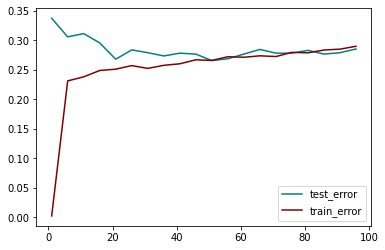

In [252]:
plt.plot(x1_ax,arr_test_e1, color='teal')
plt.plot(x1_ax,arr_train_e1, color='maroon')
plt.legend(['test_error','train_error'])
pass

Можем заметить, что уже в этом случае ошибка меньше

# Random Forest

In [253]:
from sklearn import ensemble
arr_train_e1=[]
arr_test_e1=[]
x1_ax=[]
err_test1=0
err_train1=0
for k in range(1,1002,100):
    rf1 = ensemble.RandomForestClassifier(n_estimators = k)
    rf1.fit(X1_train.values, y1_train.values)
    arr_test_e1.append(1 - rf1.score(X1_test.values, y1_test.values))
    arr_train_e1.append(1- rf1.score(X1_train.values, y1_train.values))
    x1_ax.append(k)

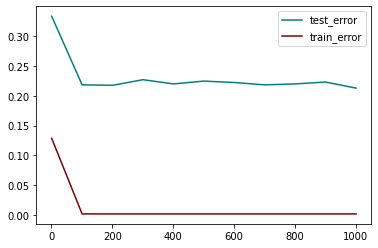

In [254]:
plt.plot(x_ax,arr_test_e, color='teal')
plt.plot(x_ax,arr_train_e, color='maroon')
plt.legend(['test_error','train_error'])
pass